In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [43]:

# Example for EUR/USD currency pair
currency_pair = 'EURUSD=X'
start_date = '2019-01-01'
end_date = '2023-01-01'

data = yf.download(currency_pair, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [44]:

# Calculate daily returns as percentage change
data['Returns'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)  # Drop the first NaN value
train_size = int(len(data) * 0.70)
train_data, test_data = data[:train_size], data[train_size:]

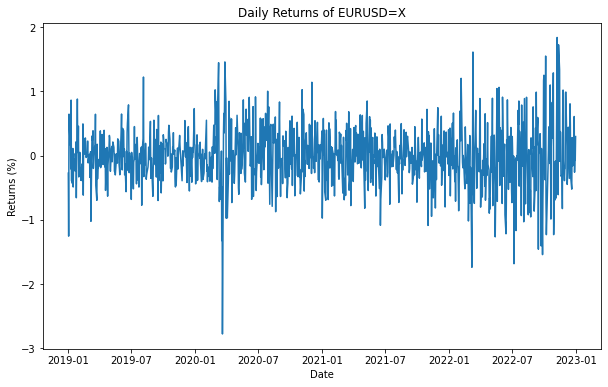

In [45]:


plt.figure(figsize=(10, 6))
plt.plot(data['Returns'])
plt.title('Daily Returns of ' + currency_pair)
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.show()


In [46]:

result = adfuller(train_data['Returns'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -11.363093
p-value: 0.000000


In [47]:


# Assuming you're using a GARCH(1,1) model
model = arch_model(train_data['Returns'], vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')
print(model_fit.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -304.450
Distribution:                  Normal   AIC:                           616.900
Method:            Maximum Likelihood   BIC:                           635.266
                                        No. Observations:                  729
Date:                Wed, Jan 03 2024   Df Residuals:                      728
Time:                        18:49:20   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.2656e-03  1.291e-02     -0.253      0.

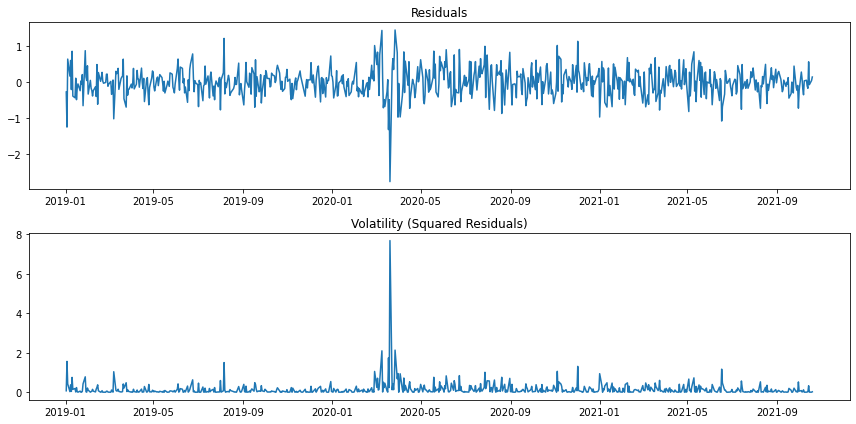

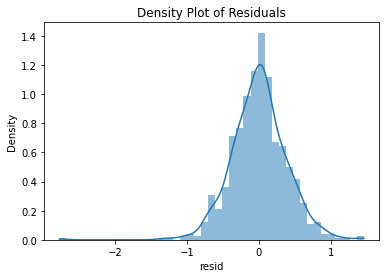

<Figure size 864x432 with 0 Axes>

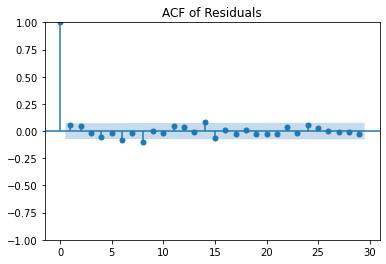

<Figure size 864x432 with 0 Axes>

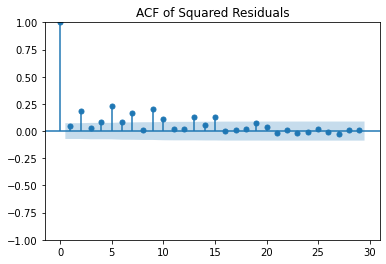

Ljung-Box test for residuals:
     lb_stat  lb_pvalue
10  19.38464   0.035641

Ljung-Box test for squared residuals:
       lb_stat     lb_pvalue
10  137.295807  1.508560e-24


In [48]:


# Assuming 'model_fit' is your fitted GARCH model from previous steps

# 1. Plot the residuals and squared residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(model_fit.resid)
plt.title('Residuals')
plt.subplot(2, 1, 2)
plt.plot(model_fit.resid**2)
plt.title('Volatility (Squared Residuals)')
plt.tight_layout()
plt.show()

# 2. Check for normality of residuals
plt.figure(figsize=(6, 4))
sns.histplot(model_fit.resid, kde=True, stat="density", linewidth=0)
plt.title('Density Plot of Residuals')
plt.show()

# 3. ACF plot of residuals and squared residuals
plt.figure(figsize=(12, 6))
plot_acf(model_fit.resid, alpha=0.05, title='ACF of Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(model_fit.resid**2, alpha=0.05, title='ACF of Squared Residuals')
plt.show()

# 4. Ljung-Box Test
lb_test = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
print("Ljung-Box test for residuals:")
print(lb_test)

lb_test_squared = acorr_ljungbox(model_fit.resid**2, lags=[10], return_df=True)
print("\nLjung-Box test for squared residuals:")
print(lb_test_squared)


C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Al

C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Al

C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Al

C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Al

C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Al

C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Al

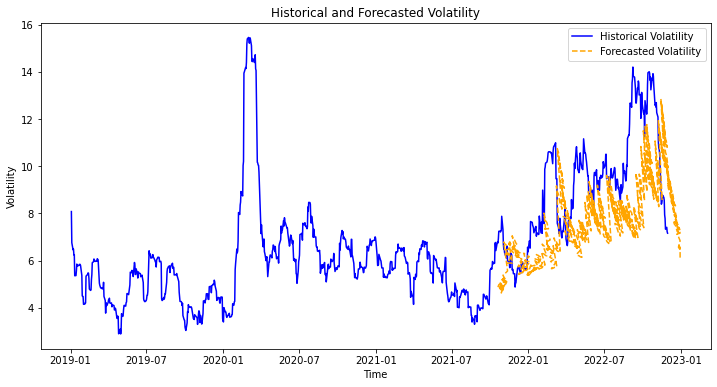

In [55]:
train_size = int(len(data) * 0.70)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Initialize lists to store results
historical_volatility = []
forecast_dates = []
forecasted_volatility = []

# Calculate historical volatility on the training dataset
window_size = 22  # One month window (22 trading days)
train_volatility = train_data['Returns'].rolling(window=window_size).std() * np.sqrt(252)

# Loop over the test data in steps of 10 days
for i in range(0, len(test_data), 2):
    current_window = pd.concat([train_data, test_data.iloc[:i]])
    model = arch_model(current_window['Returns'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off', last_obs=train_data.index[-1])

    # Forecast the next 10 days
    forecast_horizon = min(10, len(test_data) - i)  # Ensure we don't go past the end of the data
    forecasts = model_fit.forecast(horizon=forecast_horizon)
    forecast_var = forecasts.variance.dropna().values[-1, :]
    forecast_vol = np.sqrt(forecast_var) * np.sqrt(252)

    # Store the forecasted results
    forecast_index = test_data.index[i:i + forecast_horizon]
    forecast_dates.extend(forecast_index)
    forecasted_volatility.extend(forecast_vol)

    # Update historical volatility
    new_hist_vol = current_window['Returns'].rolling(window=window_size).std() * np.sqrt(252)
    historical_volatility = new_hist_vol.dropna().values.tolist()

plt.figure(figsize=(12, 6))
# Ensure that the dates and historical volatility have the same length
common_dates = train_data.index.union(test_data.index)[:len(historical_volatility)]
plt.plot(common_dates, historical_volatility, label='Historical Volatility', color='blue')
# Ensure that the forecast dates and forecasted volatility have the same length
forecast_dates = pd.to_datetime(forecast_dates[:len(forecasted_volatility)])
plt.plot(forecast_dates, forecasted_volatility, label='Forecasted Volatility', color='orange', linestyle='--')
plt.title('Historical and Forecasted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()